<a href="https://colab.research.google.com/github/mumnab/Exoplanet-Observations/blob/main/Dashbboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

In [ ]:
test_data = pd.read_csv('exoTest.csv')
train_data = pd.read_csv('exoTrain.csv')

In [ ]:
train_data.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
#categ = {2: 1,1: 0}
#train_data.LABEL = [categ[item] for item in train_data.LABEL]
#test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [ ]:
train_data.isna().values.sum() # Verified that there is no null & missing values in the training data set

0

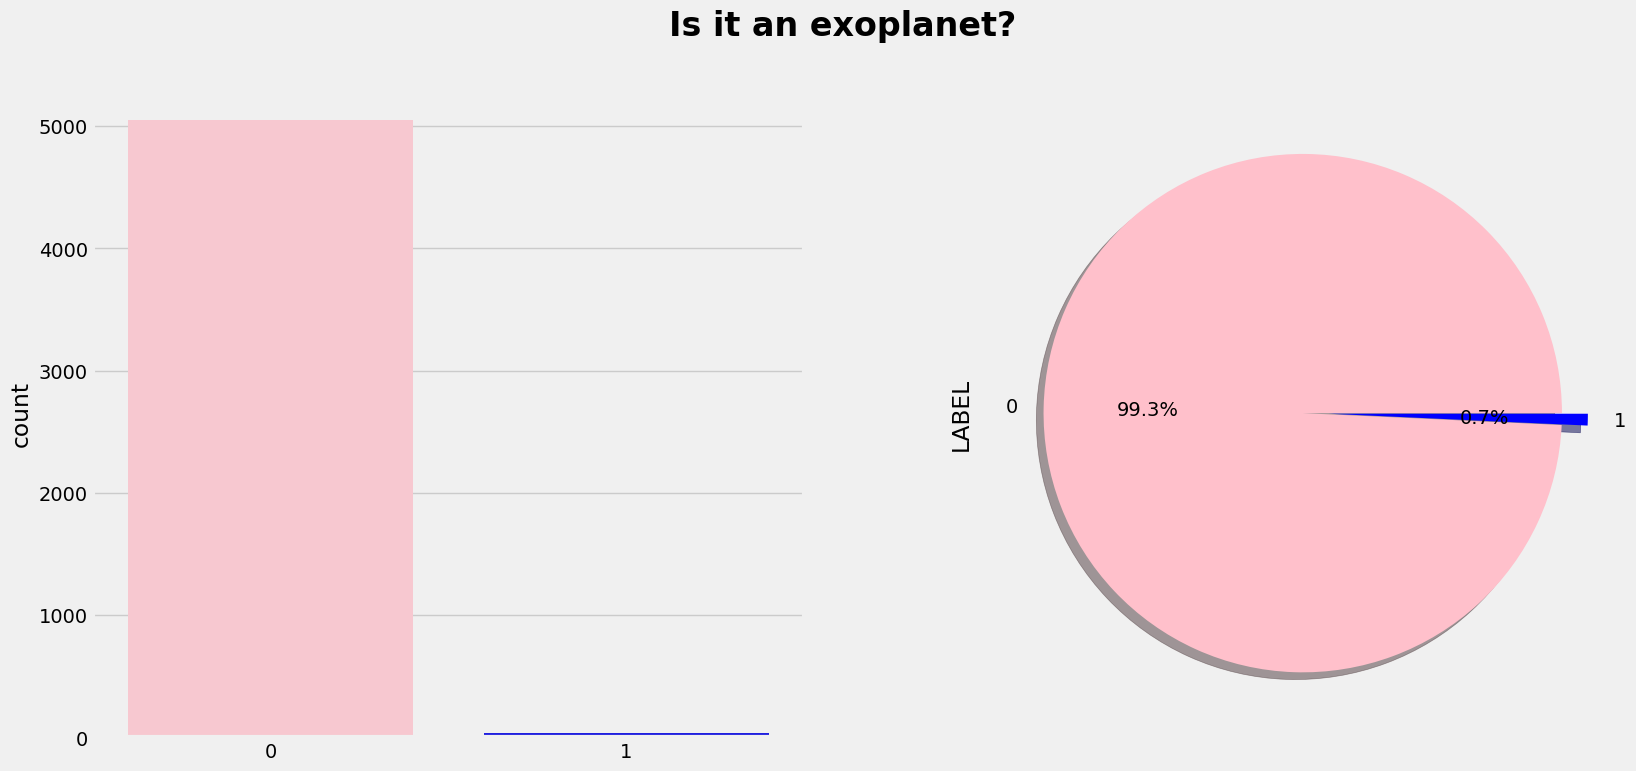

In [ ]:
import matplotlib.pyplot as plt #Import matplotlib
import seaborn as sns #Import seaborn

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# The first graph shows the countplot
sns.countplot(x='LABEL', data=train_data, palette=['pink', 'blue'], ax=ax[0])
ax[0].set_xlabel('')

# The second graph shows the Pie chart
train_data['LABEL'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[1],
    shadow=True,
    colors=['pink', 'blue']
)

fig.suptitle('Is it an exoplanet? \n', fontsize=24, fontweight='bold')
plt.show()


In [ ]:
train_y=train_data[train_data['LABEL'] == 1]
train_n=train_data[train_data['LABEL'] < 1]
train_t_n=train_n.iloc[:,1:].T
train_t_y=train_y.iloc[:,1:].T

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Fluxes for Star 60", "Fluxes for Star 257"))

fig.add_trace(
    go.Scatter(y=train_t_n[60], x=train_t_n.index, line=dict(color='purple')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=train_t_n[257], x=train_t_n.index, line=dict(color='pink')),
    row=1, col=2
)

fig.update_layout(
    height=900,
    width=900,
    title_text="Non Exoplanets Stars Fluxes!",
    showlegend=False
)

fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Fluxes for Star 12", "Fluxes for Star 0"))
fig.add_trace(
    go.Scatter(y=train_t_y[12], x=train_t_y.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[0], x=train_t_y.index),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Exoplanets Stars Fluxes!",showlegend=False)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Fluxes for Star 12", "Fluxes for Star 0"))

fig.add_trace(
    go.Scatter(y=train_t_y[12], x=train_t_y.index, line=dict(color='green')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=train_t_y[0], x=train_t_y.index, line=dict(color='blue')),
    row=1, col=2
)

fig.update_layout(
    height=600,
    width=800,
    title_text="Exoplanets Stars Fluxes!",
    showlegend=False
)

fig.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
trainx=train_data.iloc[:,1:]
textx=test_data.iloc[:,1:]
scaler=StandardScaler()
train_scaled=scaler.fit_transform(trainx)
test_scaled=scaler.fit_transform(textx)

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(train_scaled, trainy['LABEL'])
y_pred = svclassifier.predict(test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))

[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [ ]:
pip install pandas-bokeh

In [ ]:
#Make Dashboard with Grid Layout:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

df = pd.read_csv('exoTrain.csv')

# Plot the scatterplot using Plotly. We ploy y vs x (#Confirmed vs Date)
fig = px.scatter(df, x='LABEL', y='FLUX.1', color='LABEL')
fig.update_traces(mode='markers+lines')
fig.show()